In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ivhd import IVHD, IVHDGrad
from sklearn.neighbors import NearestNeighbors

Download MNIST dataset and prepare visualisation function

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.int32)

In [3]:
def visualise(X_train_ivhd, y_train_ivhd):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_train_ivhd[:, 0], y=X_train_ivhd[:, 1], hue=y_train_ivhd, palette="tab10", legend="full", alpha=0.6)
    plt.title(f"IVHD of MNIST Dataset")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    
    plt.show()

Prepare K-NN

In [4]:
n_neighbors = 5

knn_model = NearestNeighbors(n_neighbors=n_neighbors + 1)
knn_model.fit(X)
_, knn_indices = knn_model.kneighbors(X)
knn_indices = knn_indices[:, 1:]

Plain IVHD

In [5]:
ivhd = IVHD(n_components=2, nn=n_neighbors, rn=5, c=0.15, lambda_=0.85, simulation_steps=2500)
X_train_ivhd = ivhd.fit_transform(X, precomputed_nn_indices=knn_indices)

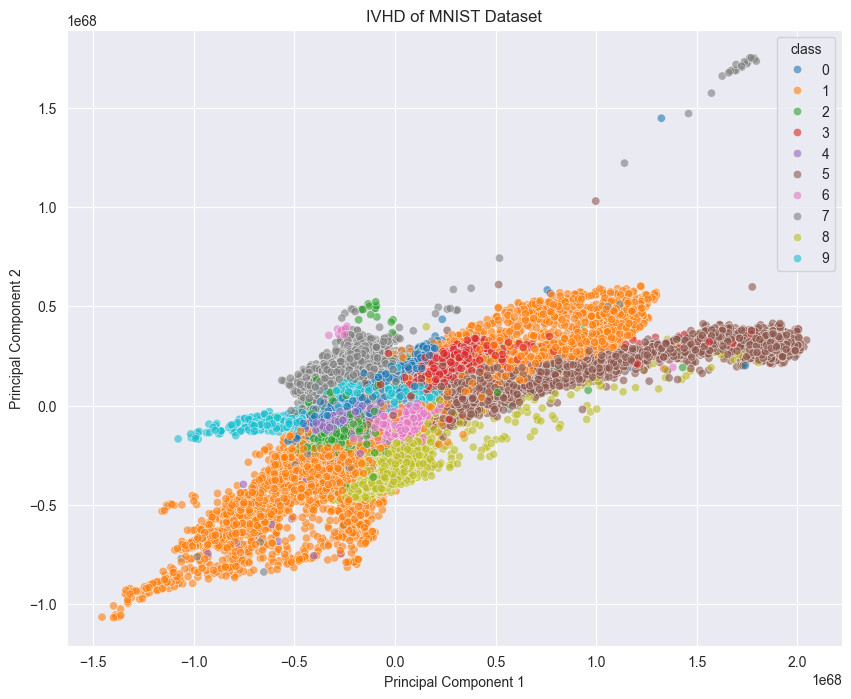

In [6]:
visualise(X_train_ivhd, y)

Gradient IVHD

In [7]:
ivhd_grad = IVHDGrad(steps=2500, nn=n_neighbors, rn=5, optimizer='adam', optimizer_params={'lr': 0.01}, pos_weight=0.9, re_draw_remote_neighbors=True)
X_train_ivhd_grad = ivhd_grad.fit_transform(X, precomputed_nn_indices=knn_indices)

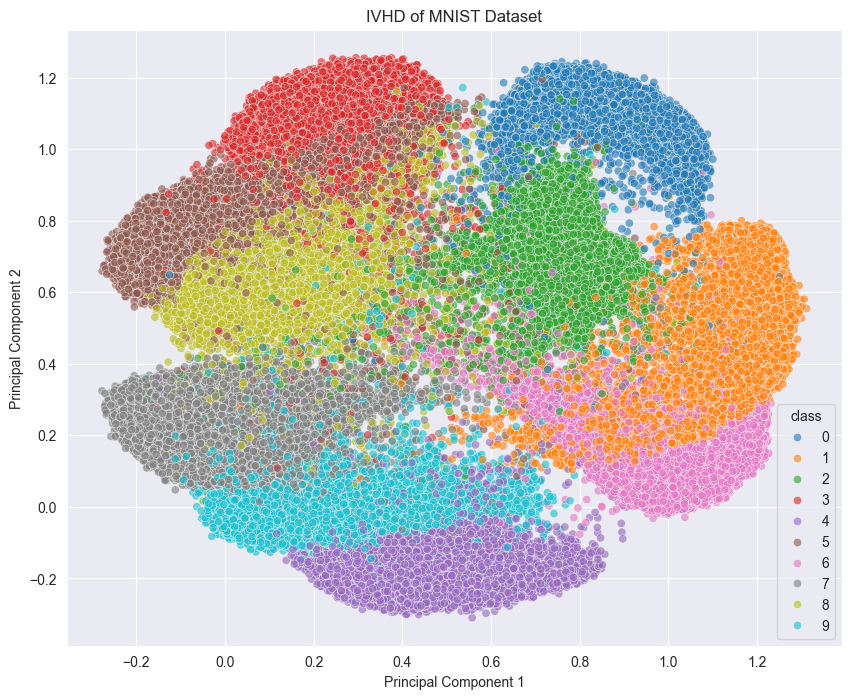

In [8]:
visualise(X_train_ivhd_grad, y)